In [1]:
from qiskit import *
from qiskit.circuit import Parameter, Gate
from qiskit.visualization import array_to_latex, plot_histogram
from qiskit.quantum_info import Operator, Statevector

import tensornetwork as tn
import jax

import numpy as np

In [48]:
Q_1 = QuantumCircuit(4,4)

Q_1.h(0)
Q_1.cp(np.pi/2,0,1)
Q_1.h(1)

sv1 = Statevector(Q_1).data

Q_2 = QuantumCircuit(4,4)

Q_2.x(0)
Q_2.x(1)
Q_2.x(2)
Q_2.x(3)

Q_2.cp(np.pi/4,0,2)
Q_2.cp(np.pi/8,0,3)
Q_2.cp(np.pi/2,1,2)
Q_2.cp(np.pi/4,1,3)

sv2 = Statevector(Q_2).data

Q_3 = QuantumCircuit(4,4)

Q_3.h(2)
Q_3.cp(np.pi/2,2,3)
Q_3.h(3)

sv3 = Statevector(Q_3).data

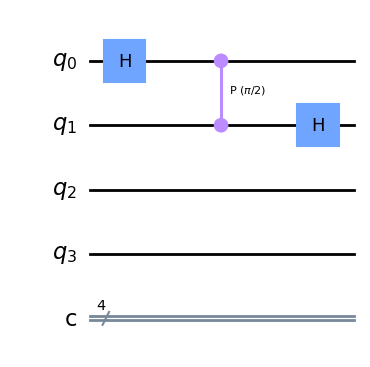

In [49]:
Q_1.draw(output='mpl')

In [50]:
array_to_latex(sv1, max_size=2**4,prefix="\\text{Statevector 1: }")

<IPython.core.display.Latex object>

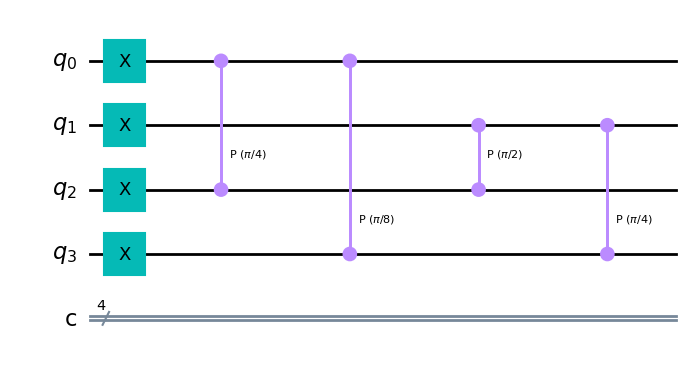

In [51]:
Q_2.draw(output='mpl')

In [52]:
array_to_latex(sv2, max_size=2**4, prefix="\\text{Statevector 2: }")

<IPython.core.display.Latex object>

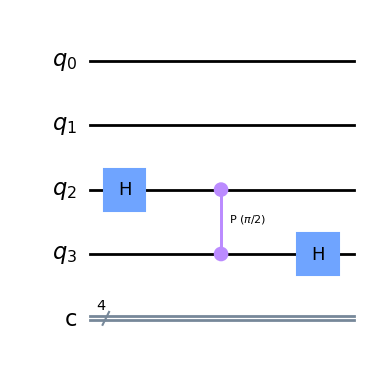

In [53]:
Q_3.draw(output='mpl')

In [26]:
array_to_latex(sv3, max_size=2**4, prefix="\\text{Statevector 3: }")

<IPython.core.display.Latex object>

In [7]:
a = tn.Node(np.ones(10))
b = tn.Node(np.ones(10))

a[0] ^ b[0]

c = tn.contract_between(a,b)
print(c.tensor)

10.0


Contract between is much faster than just contract. This is due to the fact that it'll skip operations we don't need to do when we do a final trace over the elements at the end, for example

In [5]:
T1_state = tn.Node(np.array([1.0 + 0.0j, 0.0 + 0.0j]))

qubit = T1_state[0]
qubit


Edge(Dangling Edge)[0] 